In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Load the dataset

In [ ]:
data = pd.read_csv("Advertising.csv")

In [4]:
# Define features (X) and target variable (y)
X_tv = data['TV'].values.reshape(-1, 1)
X_radio = data['Radio'].values.reshape(-1, 1)
X_newspaper = data['Newspaper'].values.reshape(-1, 1)

y = data['Sales'].values.reshape(-1, 1)

In [5]:
# Split the dataset into training and testing sets
X_train_tv, X_test_tv, y_train, y_test = train_test_split(X_tv, y, test_size=0.2, random_state=42)
X_train_radio, X_test_radio, _, _ = train_test_split(X_radio, y, test_size=0.2, random_state=42)
X_train_newspaper, X_test_newspaper, _, _ = train_test_split(X_newspaper, y, test_size=0.2, random_state=42)

In [7]:

# Feature scaling
scaler_tv = StandardScaler()
scaler_radio = StandardScaler()
scaler_newspaper = StandardScaler()
X_train_tv_scaled = scaler_tv.fit_transform(X_train_tv)
X_test_tv_scaled = scaler_tv.transform(X_test_tv)

X_train_radio_scaled = scaler_radio.fit_transform(X_train_radio)
X_test_radio_scaled = scaler_radio.transform(X_test_radio)

X_train_newspaper_scaled = scaler_newspaper.fit_transform(X_train_newspaper)
X_test_newspaper_scaled = scaler_newspaper.transform(X_test_newspaper)

In [8]:
# Add intercept term to X
X_train_tv_scaled = np.hstack((X_train_tv_scaled, np.ones((X_train_tv_scaled.shape[0], 1))))
X_test_tv_scaled = np.hstack((X_test_tv_scaled, np.ones((X_test_tv_scaled.shape[0], 1))))

X_train_radio_scaled = np.hstack((X_train_radio_scaled, np.ones((X_train_radio_scaled.shape[0], 1))))
X_test_radio_scaled = np.hstack((X_test_radio_scaled, np.ones((X_test_radio_scaled.shape[0], 1))))

X_train_newspaper_scaled = np.hstack((X_train_newspaper_scaled, np.ones((X_train_newspaper_scaled.shape[0], 1))))
X_test_newspaper_scaled = np.hstack((X_test_newspaper_scaled, np.ones((X_test_newspaper_scaled.shape[0], 1))))

In [ ]:
# Model function
def model(X, theta):
    return X.dot(theta)

In [11]:

# Cost function
def cost_function(X, y, theta):
    m = len(y)
    return 1 / (2 * m) * np.sum((model(X, theta) - y) ** 2)

In [ ]:

# Gradient function
def grad(X, y, theta):
    m = len(y)
    return 1 / m * X.T.dot(model(X, theta) - y)

In [12]:
# Gradient descent
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

In [13]:
# Train the models
np.random.seed(0)
theta_tv = np.random.randn(2, 1)
theta_radio = np.random.randn(2, 1)
theta_newspaper = np.random.randn(2, 1)

learning_rate = 0.01
n_iterations = 1000

theta_final_tv, _ = gradient_descent(X_train_tv_scaled, y_train, theta_tv, learning_rate, n_iterations)
theta_final_radio, _ = gradient_descent(X_train_radio_scaled, y_train, theta_radio, learning_rate, n_iterations)
theta_final_newspaper, _ = gradient_descent(X_train_newspaper_scaled, y_train, theta_newspaper, learning_rate, n_iterations)


In [14]:

# Make predictions
predictions_tv = model(X_test_tv_scaled, theta_final_tv)
predictions_radio = model(X_test_radio_scaled, theta_final_radio)
predictions_newspaper = model(X_test_newspaper_scaled, theta_final_newspaper)

In [ ]:


# Evaluate the models
r2_tv = r2_score(y_test, predictions_tv)
r2_radio = r2_score(y_test, predictions_radio)
r2_newspaper = r2_score(y_test, predictions_newspaper)

correlation_tv = np.corrcoef(predictions_tv.flatten(), y_test.flatten())[0, 1]
correlation_radio = np.corrcoef(predictions_radio.flatten(), y_test.flatten())[0, 1]
correlation_newspaper = np.corrcoef(predictions_newspaper.flatten(), y_test.flatten())[0, 1]

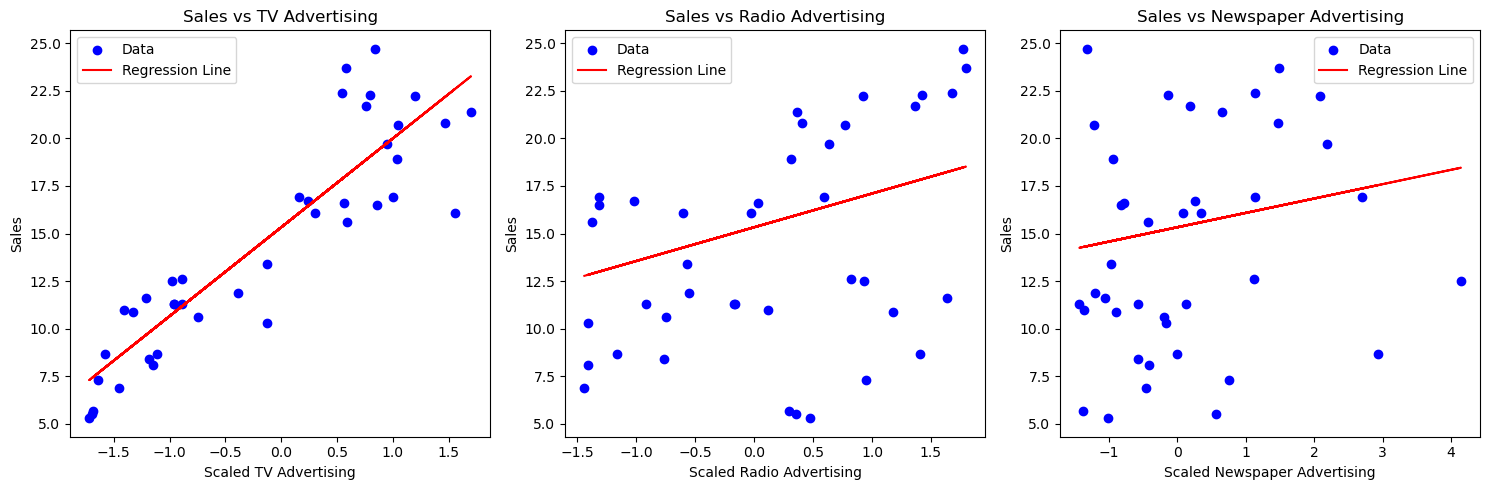

     Feature  R-squared  Correlation
0         TV   0.802569     0.896426
1      Radio   0.107015     0.403613
2  Newspaper   0.004637     0.214637


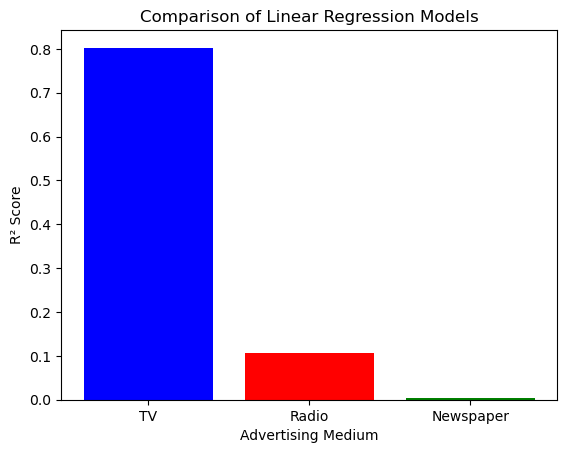

In [17]:
# Plot the data and regression line
plt.figure(figsize=(15, 5))

# TV
plt.subplot(1, 3, 1)
plt.scatter(X_test_tv_scaled[:, 0], y_test, color='blue', label='Data')
plt.plot(X_test_tv_scaled[:, 0], predictions_tv, color='red', label='Regression Line')
plt.title('Sales vs TV Advertising')
plt.xlabel('Scaled TV Advertising')
plt.ylabel('Sales')
plt.legend()

# Radio
plt.subplot(1, 3, 2)
plt.scatter(X_test_radio_scaled[:, 0], y_test, color='blue', label='Data')
plt.plot(X_test_radio_scaled[:, 0], predictions_radio, color='red', label='Regression Line')
plt.title('Sales vs Radio Advertising')
plt.xlabel('Scaled Radio Advertising')
plt.ylabel('Sales')
plt.legend()

# Newspaper
plt.subplot(1, 3, 3)
plt.scatter(X_test_newspaper_scaled[:, 0], y_test, color='blue', label='Data')
plt.plot(X_test_newspaper_scaled[:, 0], predictions_newspaper, color='red', label='Regression Line')
plt.title('Sales vs Newspaper Advertising')
plt.xlabel('Scaled Newspaper Advertising')
plt.ylabel('Sales')
plt.legend()

plt.tight_layout()
plt.show()

# Display results
results = pd.DataFrame({
    'Feature': ['TV', 'Radio', 'Newspaper'],
    'R-squared': [r2_tv, r2_radio, r2_newspaper],
    'Correlation': [correlation_tv, correlation_radio, correlation_newspaper]
})

print(results)
# Comparaison des modèles
models = ['TV', 'Radio', 'Newspaper']
r2_scores = [r2_tv, r2_radio, r2_newspaper]

plt.bar(models, r2_scores, color=['blue', 'red', 'green'])
plt.xlabel('Advertising Medium')
plt.ylabel('R² Score')
plt.title('Comparison of Linear Regression Models')
plt.show()
